In [1]:
from __future__ import print_function
import numpy as np
import cv2 as cv

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15, 15]

In [4]:
imgL = cv.pyrDown(cv.imread('aloeL.jpg'))  # downscale images for faster processing
imgR = cv.pyrDown(cv.imread('aloeR.jpg'))

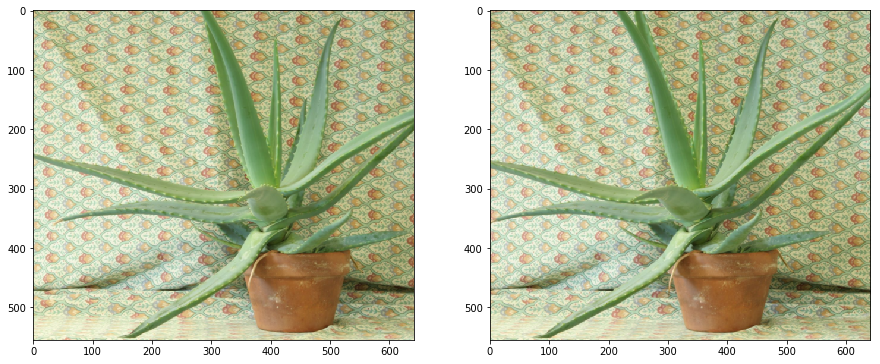

In [5]:
plt.subplot(121); plt.imshow(cv.cvtColor(imgL, cv.COLOR_BGR2RGB));
plt.subplot(122); plt.imshow(cv.cvtColor(imgR, cv.COLOR_BGR2RGB));

In [6]:
# disparity range is tuned for 'aloe' image pair
window_size = 3
min_disp = 16
num_disp = 112-min_disp
stereo = cv.StereoSGBM_create(minDisparity = min_disp,
    numDisparities = num_disp,
    blockSize = 16,
    P1 = 8*3*window_size**2,
    P2 = 32*3*window_size**2,
    disp12MaxDiff = 1,
    uniquenessRatio = 10,
    speckleWindowSize = 100,
    speckleRange = 32
)
disp = stereo.compute(imgL, imgR).astype(np.float32) / 16.0

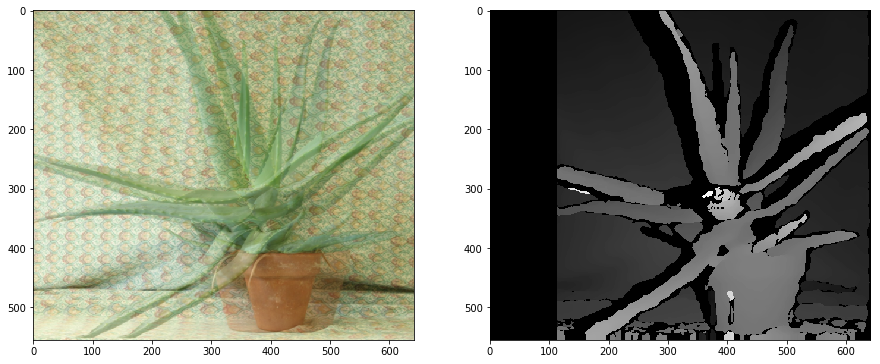

In [7]:
blended = cv.addWeighted(imgL,0.5,imgR,0.5,0)
plt.subplot(121); plt.imshow(cv.cvtColor(blended, cv.COLOR_BGR2RGB));
plt.subplot(122); plt.imshow(disp,cmap='gray');